# Problem 2
The differential equation for the velocity of a bungee jumper is different depending on
whether the jumper has fallen to a distance where the cord is fully extended and begins to
stretch. Thus, if the distance fallen is less than the cord length, the jumper is only subject to
gravitational and drag forces. Once the cord begins to stretch, the spring and dampening
forces of the cord must also be included. These two conditions can be expressed by the
following equations:

    dv/dt = { g − sign(v)cd/m * v2                 , x ≤ L }

            { g − sign(v)cd/m * v2 − km(x − L) −γmv, x > L }

where v is velocity (m/s), t is time (s), g is gravitational constant (9.81 m/s2), sign(x) is a function that returns −1, 0, 1 for negative, zero, and positive x, respectively, cd is second-order drag coefficient (kg/m), m is mass (kg), k is cord spring constant (N/m), γ is cord dampening coefficient (Ns/m), and L cord length (m). Determine the position and velocity of the jumper given the following parameters: L = 30 m, m = 68.1 kg, cd = 0.25 kg/m, k = 40 N/m, and γ = 8 kg/s. Perform the computation from t = 0 to 50 s and assume that the
initial conditions are: x(0) = v(0) = 0. You are required to write a computer program implementing the Fourth order Runge-Kutta method.

Initial Time: 0.00s, Initial Position: 0.00m, Initial Velocity: 0.00m/s
Final Time: 50.00s, Final Position: 43.35 m, Final Velocity: -1.76 m/s


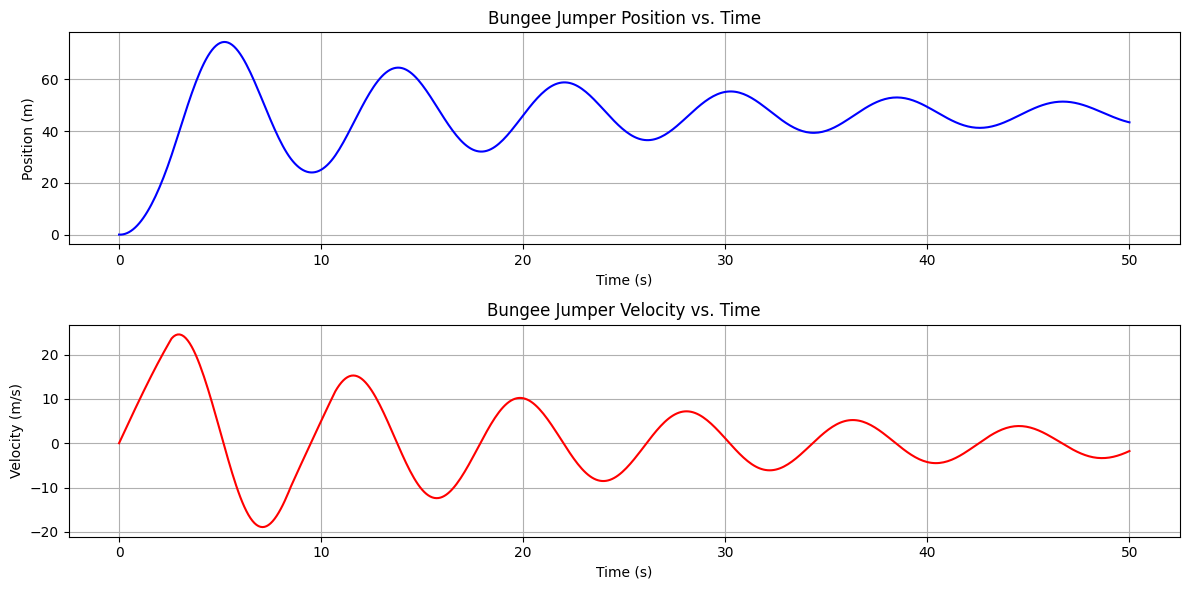

In [21]:
import matplotlib.pyplot as plt
import numpy as np

L = 30
cd = 0.25
g = 9.81
k = 40
y = 8
m = 68.1
h = 0.1  # Step size --> 0.1

def sign(v):
    if v < 0:
        return -1
    elif v == 0:
        return 0
    else:
        return 1

def f(x, v):
    if x <= L:
        return g - sign(v) * (cd / m) * (v ** 2)
    else:
        return g - sign(v) * (cd / m) * (v ** 2) - (k / m) * (x - L) - (y / m) * v

x = 0
v = 0
X_list = [0]
V_list = [0]

print(f"Initial Time: {0:.2f}s, Initial Position: {x:.2f}m, Initial Velocity: {v:.2f}m/s")

for i in range(int(50 / h)):
    k1 = f(x, v)
    k2 = f(x + h / 2, v + k1 * (h / 2))
    k3 = f(x + h / 2, v + k2 * (h / 2))
    k4 = f(x + h, v + k3 * h)

    x1 = x + v * h
    v1 = v + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * h
    x = x1
    X_list.append(x)
    v = v1
    V_list.append(v)

    time = (i + 1) * h
    # print(f"Time: {time:.2f}s, Position: {x:.2f}m, Velocity: {v:.2f}m/s")

xf = X_list[-1]
vf = V_list[-1]
print(f"Final Time: {time:.2f}s, Final Position: {xf:.2f} m, Final Velocity: {vf:.2f} m/s")

time_points = list(np.arange(0, 50, h))
time_points.append(50)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_points, X_list, color='blue')
plt.title('Bungee Jumper Position vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_points, V_list, color='red')
plt.title('Bungee Jumper Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()